# Energy consumption

## Import data from .xls spreadsheet

In [2]:
# https://www.datacamp.com/community/tutorials/python-excel-tutorial

import pandas as pd

file = 'energy_consumption.xlsx'

xl = pd.ExcelFile(file)

df = xl.parse('Tabelle1')

#Alternative way to load a sheet into a dataframe
#df = pd.read_excel(xl, 'Tabelle1')

In [3]:
#Pandas introduction: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
#Pandas cheat sheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf

df.set_index('date', inplace=True)
print(df)

          5010116009  5010115909  5010115709  5010116109  5010115609  \
date                                                                   
20180901       44107       41201       14946       24385       15849   
20181001       44395       41494       15074       24526       15966   
20181101       44715       41814       15196       24691       16106   
20181201       45058       42136       15350       24837       16244   

          5010116209  5010115809  5010115509  5010114009  5010114209  
date                                                                  
20180901       17370       16918       24301       40200        8506  
20181001       17531       17052       24482       40713        8580  
20181101       17702       17197       24691       41361        8661  
20181201       17878       17436       24906       42000        8743  


In [8]:
df.diff()

,5010116009,5010115909,5010115709,5010116109,5010115609,5010116209,5010115809,5010115509,5010114009,5010114209
date,,,,,,,,,,
20180901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20181001,288.0,293.0,128.0,141.0,117.0,161.0,134.0,181.0,513.0,74.0
20181101,320.0,320.0,122.0,165.0,140.0,171.0,145.0,209.0,648.0,81.0
20181201,343.0,322.0,154.0,146.0,138.0,176.0,239.0,215.0,639.0,82.0


In [9]:
import matplotlib.pyplot as plt
from matplotlib import style
#style.use('fivethirtyeight')
style.use('ggplot')

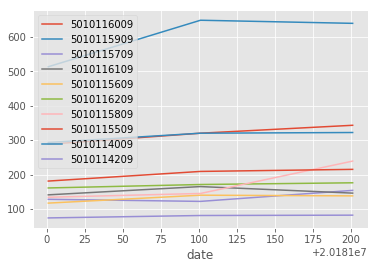

In [10]:
df2 = df.diff()
df2.plot()
plt.show()

In [11]:
consumption = []

for i in df.columns:
    consumption.append(df.loc[20181001, i] - df.loc[20180901, i])
    
print(consumption)

[288, 293, 128, 141, 117, 161, 134, 181, 513, 74]


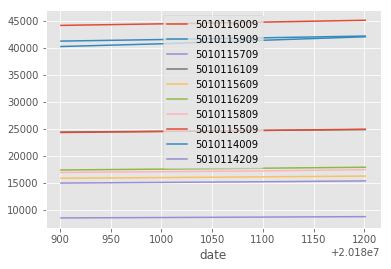

In [12]:
df.plot()
plt.show()

## Monthly energy consumption per party and total

### single bar chart:

### 3D bar chart:

## Monthly energy consumption per person

## Yearly energy consumption per party and total

## Summer vs winter months

## Month with highest/lowest consumption